Número de moedas detectadas: 42


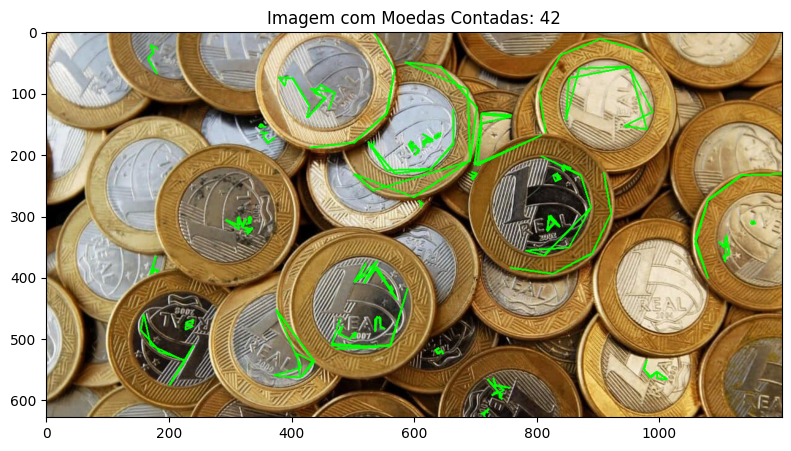

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imagem = cv2.imread('moedas.jpg')

imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

imagem_suave = cv2.GaussianBlur(imagem_cinza, (9, 9), 0)

bordas = cv2.Canny(imagem_suave, 30, 150)

contornos, _ = cv2.findContours(bordas.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contador = 0

for contour in contornos:
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.034 * peri, True)

    if len(approx) >= 8:
        contador += 1
        cv2.drawContours(imagem, [approx], -1, (0, 255, 0), 2)

print(f"Número de moedas detectadas: {contador}")

plt.figure(figsize=(10, 5))
plt.title(f"Imagem com Moedas Contadas: {contador}")
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.show()
